# Precision NeuroImaging - `fastsurfer`

In [1]:
# Set the environment
import os
import numpy as np
import matplotlib as plt
import nibabel as nb
from nibabel.freesurfer.mghformat import load
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69

# Set the working directory to the 'out' directory
os.chdir("/data_/mica3/BIDS_PNI/") 

# This variable will be different for each subject
subjectID='sub-PNC001_ses-01'
subjectDir='micapipe/sub-PNC001/ses-01'

# Set paths and variables
dir_FS = '/data_/mica3/BIDS_PNI/derivatives/fastsurfer/' + subjectID
dir_FSraw = '/data_/mica3/BIDS_PNI/derivatives_dev/fastsurfer/' + subjectID
#dir_conte = subjectDir + '/anat/surfaces/conte69/'
#dir_morph = subjectDir + '/anat/surfaces/morphology/'
#dir_mpc = subjectDir + '/anat/surfaces/micro_profiles/'

# Load native pial surface
surf_lh = read_surface(dir_FS+'/surf/lh.pial', itype='fs')
surf_rh = read_surface(dir_FS+'/surf/rh.pial', itype='fs')

# Load native white matter surface
wm_lh = read_surface(dir_FS+'/surf/lh.white', itype='fs')
wm_rh = read_surface(dir_FS+'/surf/rh.white', itype='fs')

# Load native inflated surface
inf_lh = read_surface(dir_FS+'/surf/lh.inflated', itype='fs')
inf_rh = read_surface(dir_FS+'/surf/rh.inflated', itype='fs')

# Load native pial surface
surf_lhr = read_surface(dir_FSraw+'/surf/lh.pial', itype='fs')
surf_rhr = read_surface(dir_FSraw+'/surf/rh.pial', itype='fs')

# Load native inflated surface
inf_lhr = read_surface(dir_FSraw+'/surf/lh.inflated', itype='fs')
inf_rhr = read_surface(dir_FSraw+'/surf/rh.inflated', itype='fs')

# Load native white matter surface
wm_lhr = read_surface(dir_FSraw+'/surf/lh.white', itype='fs')
wm_rhr = read_surface(dir_FSraw+'/surf/rh.white', itype='fs')

# Colormap
ColCurv= plt.colors.ListedColormap(['#A2CD5A', '#A0CA5B', '#9FC85C', '#9EC55D', '#9DC35E', '#9CC05F', '#9BBE61', '#9ABB62', '#99B963', '#98B664', '#96B465', '#95B166', '#94AF68', '#93AC69', '#92AA6A', '#91A76B', '#90A56C', '#8FA26D', '#8EA06F', '#8C9D70', '#8B9B71', '#8A9972', '#899673', '#889475', '#879176', '#868F77', '#858C78', '#848A79', '#82877A', '#81857C', '#80827D', '#7F807E', '#807D7D', '#827A7A', '#857777', '#877575', '#8A7272', '#8C6F6F', '#8F6C6C', '#916969', '#946666', '#966464', '#996161', '#9B5E5E', '#9D5B5B', '#A05858', '#A25656', '#A55353', '#A75050', '#AA4D4D', '#AC4A4A', '#AF4747', '#B14545', '#B44242', '#B63F3F', '#B93C3C', '#BB3939', '#BE3636', '#C03434', '#C33131', '#C52E2E', '#C82B2B', '#CA2828', '#CD2626'])
grey = plt.colors.ListedColormap(np.full((256, 4), [0.65, 0.65, 0.65, 1]))


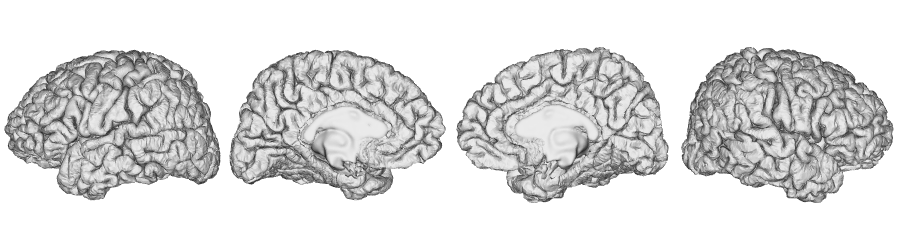

In [2]:
# Plot the surface
plot_hemispheres(surf_lh, surf_rh, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap=grey, transparent_bg=False)

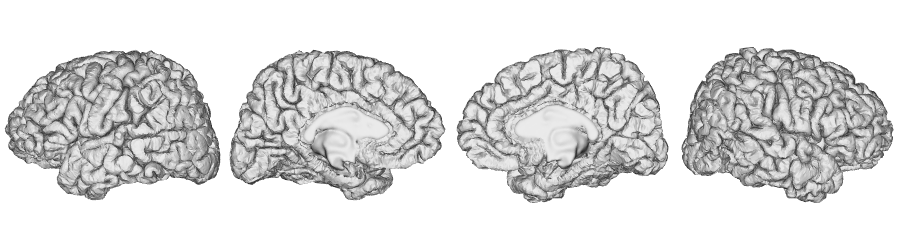

In [3]:
# Plot the surface
plot_hemispheres(surf_lhr, surf_rhr, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap=grey, transparent_bg=False)

# Thickness
## Manual corrections

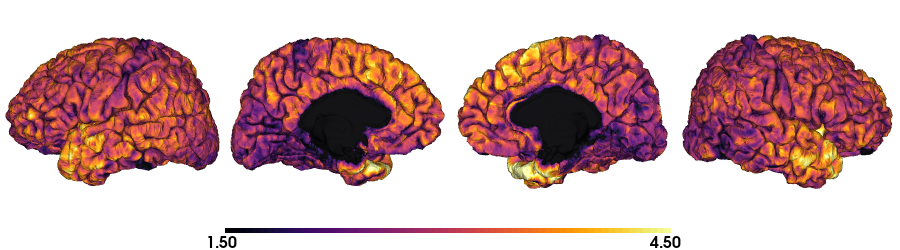

In [4]:
# Freesurfer native thickness
th = np.concatenate((nb.freesurfer.read_morph_data(dir_FS + '/surf/lh.thickness'), nb.freesurfer.read_morph_data(dir_FS + '/surf/rh.thickness')), axis=0)
plot_hemispheres(surf_lh, surf_rh, array_name=th, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(1.5, 4.5), cmap="inferno",transparent_bg=False)

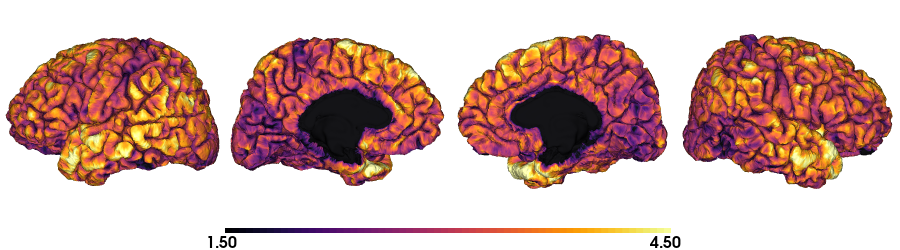

In [5]:
# Freesurfer native thickness
thr = np.concatenate((nb.freesurfer.read_morph_data(dir_FSraw + '/surf/lh.thickness'), nb.freesurfer.read_morph_data(dir_FSraw + '/surf/rh.thickness')), axis=0)
plot_hemispheres(surf_lhr, surf_rhr, array_name=thr, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(1.5, 4.5), cmap="inferno",transparent_bg=False)

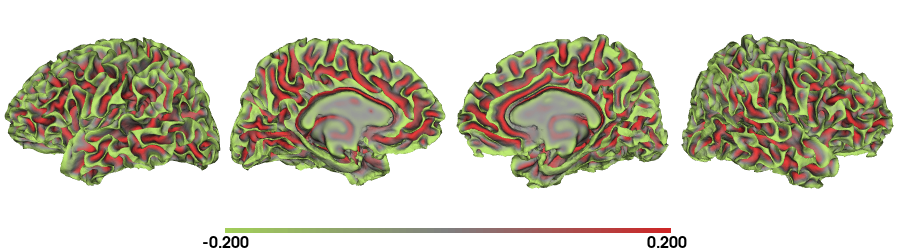

In [6]:
# Freesurfer native curvature
cv = np.concatenate((nb.freesurfer.read_morph_data(dir_FS + '/surf/lh.curv'), nb.freesurfer.read_morph_data(dir_FS + '/surf/rh.curv')), axis=0)
plot_hemispheres(wm_lh, wm_rh, array_name=cv, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap=ColCurv,transparent_bg=False)

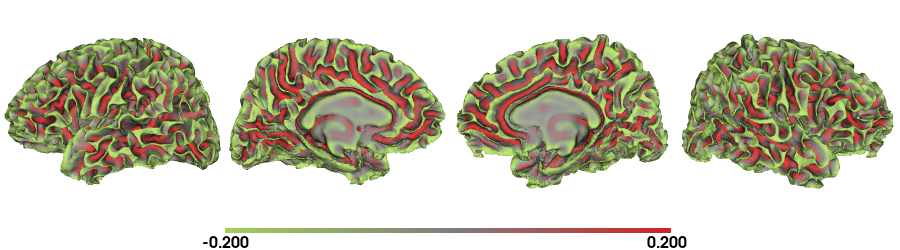

In [7]:
# Freesurfer native curvature
cv = np.concatenate((nb.freesurfer.read_morph_data(dir_FSraw + '/surf/lh.curv'), nb.freesurfer.read_morph_data(dir_FSraw + '/surf/rh.curv')), axis=0)
plot_hemispheres(wm_lhr, wm_rhr, array_name=cv, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap=ColCurv,transparent_bg=False)

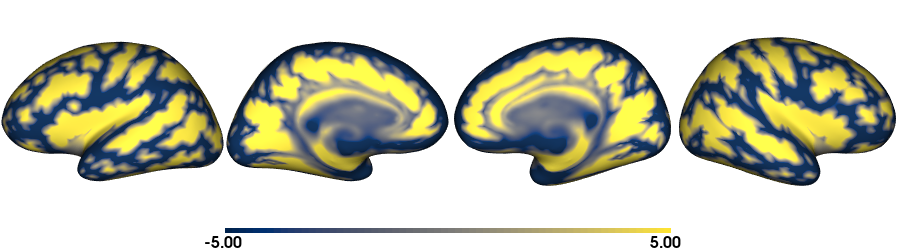

In [8]:
# Freesurfer native sulcal depth
sd = np.concatenate((nb.freesurfer.read_morph_data(dir_FS + '/surf/lh.sulc'), nb.freesurfer.read_morph_data(dir_FS + '/surf/rh.sulc')), axis=0)
plot_hemispheres(inf_lh, inf_rh, array_name=sd, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-5, 5), cmap='cividis',transparent_bg=False)

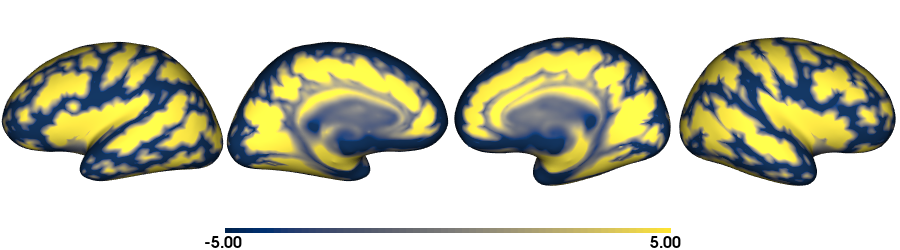

In [9]:
# Freesurfer native sulcal depth
sd = np.concatenate((nb.freesurfer.read_morph_data(dir_FSraw + '/surf/lh.sulc'), nb.freesurfer.read_morph_data(dir_FSraw + '/surf/rh.sulc')), axis=0)
plot_hemispheres(inf_lhr, inf_rhr, array_name=sd, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-5, 5), cmap='cividis',transparent_bg=False)

In [76]:
# Set atlas

(229140,)

# Geodesic distance gradient

# MPC gradient

# Functional gradient

# Structural connectome gradient